In [43]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

tf.random.set_seed(42)
np.random.seed(42)

In [44]:
vector_x = tf.constant([1.0, 2.0, 3.0, 4.0], dtype=tf.float32)
scalar_y = tf.constant(7)
matrix_m = tf.constant([[1, 2, 3], [4, 5, 6]], dtype=tf.int32)

tensor_3d = tf.constant(
    [
        [[1., 0., -1.], [2., 3., 4.]],
        [[-2., -3., -4.], [5., 6., 7.]]
    ],
    dtype=tf.float32
)

In [45]:
def tensor_info(t):
    return {
        "shape": t.shape,
        "rank": int(tf.rank(t)),
        "size": int(tf.size(t))
    }

for name, t in {
    "vector_x": vector_x,
    "scalar_y": scalar_y,
    "matrix_m": matrix_m,
    "tensor_3d": tensor_3d
}.items():
    info = tensor_info(t)
    print(f"{name}: shape={info['shape']}, rank={info['rank']}, size={info['size']}")

vector_x: shape=(4,), rank=1, size=4
scalar_y: shape=(), rank=0, size=1
matrix_m: shape=(2, 3), rank=2, size=6
tensor_3d: shape=(2, 2, 3), rank=3, size=12


In [46]:
tensor_a = tf.random.uniform(shape=[5, 300], minval=0.0, maxval=1.0)
tensor_b = tf.random.uniform(shape=[5, 300], minval=0.0, maxval=1.0)

print("\ntensor_a.shape, tensor_b.shape:", tensor_a.shape, tensor_b.shape)


tensor_a.shape, tensor_b.shape: (5, 300) (5, 300)


In [47]:
matrix_multiply = tf.matmul(tensor_a, tensor_b, transpose_b=True)
print("(A @ B^T).shape:", matrix_multiply.shape)

(A @ B^T).shape: (5, 5)


In [48]:
scalar_product = tf.reduce_sum(tensor_a * tensor_b)
print("Скалярний добуток:", float(scalar_product))


Скалярний добуток: 382.345703125


In [49]:
image_tensor = tf.random.uniform([224, 224, 3])
print("image_tensor.shape:", image_tensor.shape)

image_tensor.shape: (224, 224, 3)


In [50]:
img_min = tf.reduce_min(image_tensor)
img_max = tf.reduce_max(image_tensor)
print("img min/max:", float(img_min), float(img_max))

img min/max: 2.384185791015625e-07 0.999991774559021


In [51]:
image_4d = tf.random.uniform([1, 224, 224, 3])
image_3d = tf.squeeze(image_4d, axis=0)
print("Before:", image_4d.shape, "After:", image_3d.shape)

Before: (1, 224, 224, 3) After: (224, 224, 3)


In [52]:
values_10 = tf.constant([3, 7, 1, 9, 0, -2, 9, 4, 4, 8], dtype=tf.int32)
max_index = tf.argmax(values_10)

print("values_10:", values_10.numpy(), "argmax index:", int(max_index))

values_10: [ 3  7  1  9  0 -2  9  4  4  8] argmax index: 3


In [53]:
one_hot_encoded = tf.one_hot(max_index, depth=10)
print("one-hot:", one_hot_encoded.numpy())

one-hot: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]



[REG] Test MSE: 0.1033, MAE: 0.2600


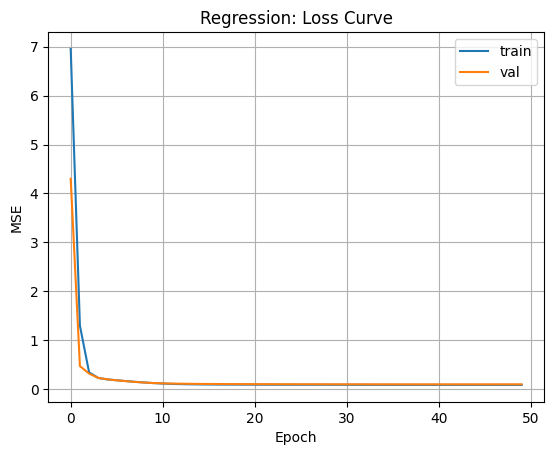

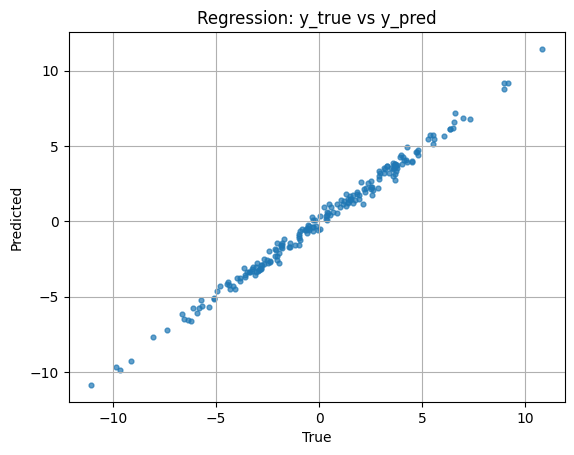

In [54]:
num_samples = 1000

features_reg = tf.random.normal([num_samples, 2])
noise_reg = tf.random.normal([num_samples, 1], stddev=0.3)

targets_reg = 3.0 * features_reg[:, :1] - 2.0 * features_reg[:, 1:] + 0.5 + noise_reg

X_train, X_test, y_train, y_test = train_test_split(
    features_reg.numpy(), targets_reg.numpy(),
    test_size=0.2, random_state=42
)

regression_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1)
])

regression_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-2),
    loss="mse",
    metrics=["mae"]
)

history_reg = regression_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    verbose=0
)

loss_reg, mae_reg = regression_model.evaluate(X_test, y_test, verbose=0)
print(f"\n[REG] Test MSE: {loss_reg:.4f}, MAE: {mae_reg:.4f}")

plt.figure()
plt.plot(history_reg.history["loss"], label="train")
plt.plot(history_reg.history["val_loss"], label="val")
plt.title("Regression: Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.grid()
plt.show()

pred_reg = regression_model.predict(X_test, verbose=0)

plt.figure()
plt.scatter(y_test, pred_reg, s=12, alpha=0.7)
plt.title("Regression: y_true vs y_pred")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.grid()
plt.show()

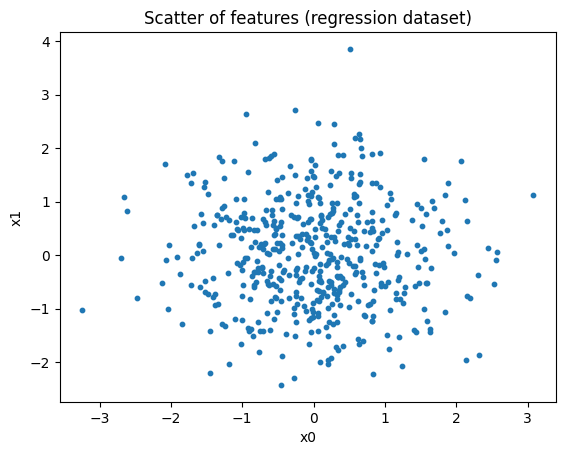

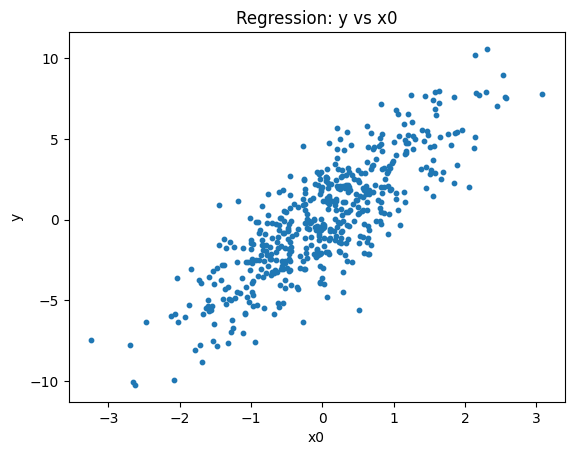

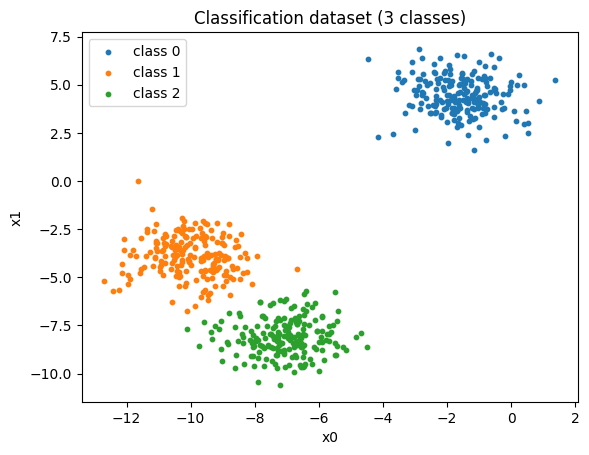

In [55]:
# Plot regression and classification datasets (each plot in its own figure)

# Regression scatter of features
plt.figure()
plt.scatter(reg_df['x0'], reg_df['x1'], s=10)
plt.title('Scatter of features (regression dataset)')
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

# Regression: y vs x0
plt.figure()
plt.scatter(reg_df['x0'], reg_df['y'], s=10)
plt.title('Regression: y vs x0')
plt.xlabel('x0')
plt.ylabel('y')
plt.show()

# Classification scatter with labels
plt.figure()
for lab in sorted(clf_df['label'].unique()):
    sel = clf_df[clf_df['label'] == lab]
    plt.scatter(sel['x0'], sel['x1'], s=10, label=f'class {lab}')
plt.title('Classification dataset (3 classes)')
plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.show()


[CLF] Test loss: 0.2276, accuracy: 0.9042


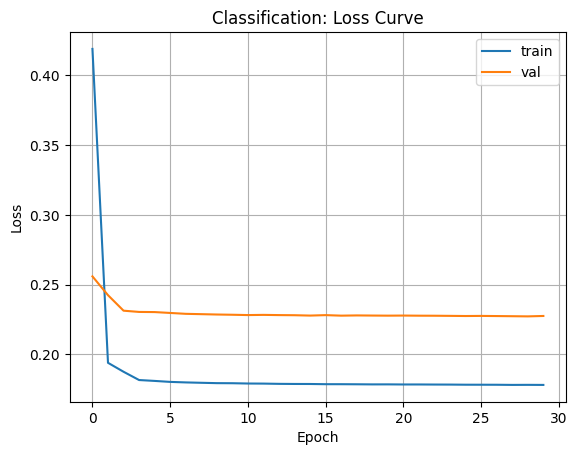

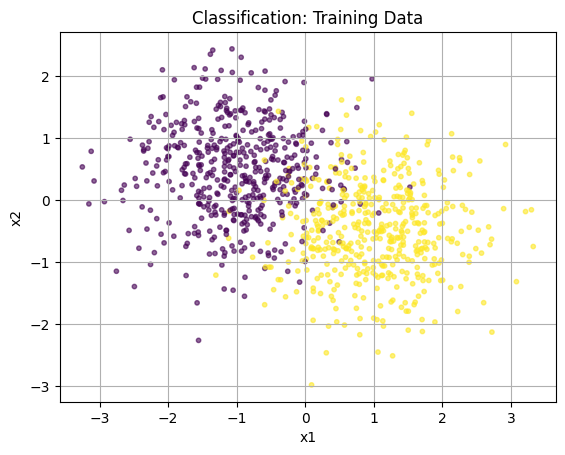

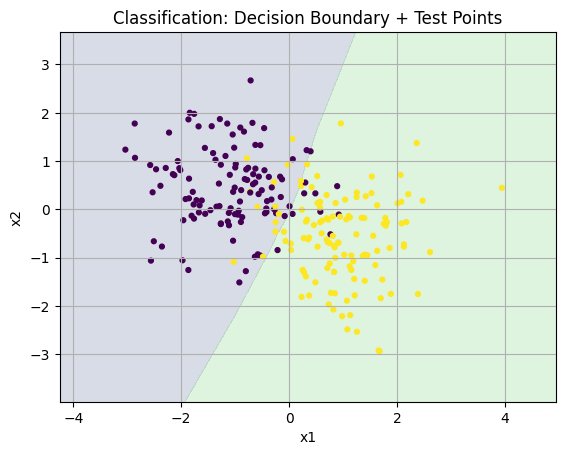

In [56]:
samples_0 = 600
samples_1 = 600

mean_class0 = tf.constant([-1.0, 0.5])
mean_class1 = tf.constant([1.0, -0.5])

cov_matrix = tf.constant([[0.6, 0.0], [0.0, 0.6]], dtype=tf.float32)

class0_data = tf.random.normal([samples_0, 2]) @ tf.linalg.cholesky(cov_matrix) + mean_class0
class1_data = tf.random.normal([samples_1, 2]) @ tf.linalg.cholesky(cov_matrix) + mean_class1

X_clf = tf.concat([class0_data, class1_data], axis=0).numpy()
y_clf = tf.concat([
    tf.zeros([samples_0, 1]),
    tf.ones([samples_1, 1])
], axis=0).numpy().astype(np.int32)

(X_train, X_test,
 y_train, y_test) = train_test_split(
    X_clf, y_clf,
    test_size=0.2,
    random_state=42,
    stratify=y_clf
)

clf_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

clf_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-2),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history_clf = clf_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    verbose=0
)

loss_clf, acc_clf = clf_model.evaluate(X_test, y_test, verbose=0)
print(f"[CLF] Test loss: {loss_clf:.4f}, accuracy: {acc_clf:.4f}")

plt.figure()
plt.plot(history_clf.history["loss"], label="train")
plt.plot(history_clf.history["val_loss"], label="val")
plt.title("Classification: Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.ravel(), s=10, alpha=0.6)
plt.title("Classification: Training Data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.show()

# Decision boundary
x_min, x_max = X_clf[:, 0].min() - 1, X_clf[:, 0].max() + 1
y_min, y_max = X_clf[:, 1].min() - 1, X_clf[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

grid_points = np.c_[xx.ravel(), yy.ravel()]
zz = clf_model.predict(grid_points, verbose=0).reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, zz, levels=[0.0, 0.5, 1.0], alpha=0.2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test.ravel(), s=12)
plt.title("Classification: Decision Boundary + Test Points")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.show()